# Computer Lab SD-TSIA 211: Digit recognition

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

5


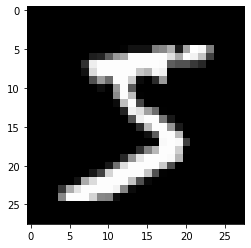

In [139]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

## 4) Model

In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


There are 26,506 optimization variables that we are going to train using this model

## 5) Stochastic gradient descent

### model initialization

In [129]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [130]:
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

2.3137066

### Implementation of the stochastic gradient descent for the resolution of the neural network model

In [131]:
def update_weights(model, grad, step_size):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - step_size*grad[i]
    model.set_weights(new_weights)

In [132]:
def compute_grad(x_batch, y_batch, model, batch_size):
    with tf.GradientTape() as tape:
            logits = model(x_batch)  
            loss_value = loss(y_batch, logits)
    return tape.gradient(loss_value, model.trainable_weights)

In [133]:
def SGD(model, x_train, y_train, sample_for_eval, batch_size = 50, gamma0 = 0.5, verbose = False):
    losses = []
    k = 1
    indexs = np.split(np.random.choice(len(y_train),len(y_train),replace=False),len(y_train)//batch_size)
    for index in indexs :
        gamma = gamma0/np.sqrt(k)
        grad = compute_grad(x_train[index],y_train[index],model,batch_size)
        update_weights(model, grad, gamma)
        k += 1
        logits = model(x_train[samples_for_evaluation])
        losses.append(loss(y_train[samples_for_evaluation], logits).numpy())
    return losses

### Run for one pass over the data 

In [134]:
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

2.3137066

In [135]:
%%time
sample = np.random.randint(0, 10000, 1000)
losses = SGD(model, x_train, y_train, sample, 16)

Wall time: 1min 27s


### Plot of the objective value as a function of the iterations

Loss value :
0.23030277


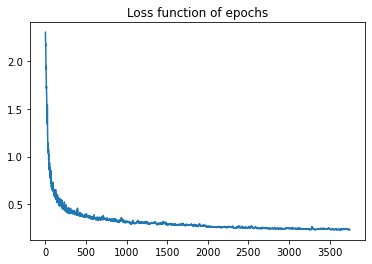

In [136]:
plt.title("Loss function of epochs")
plt.plot(losses)
print("Loss value :")
print(losses[len(losses)-1])

## 6) Empirical risk minization

In [123]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [124]:
def SGD2(model, x_train, y_train, sample_for_eval, n_epochs, batch_size, gamma0 = 0.5):   
    e_steps, e_losses = [], []
    for epoch in range(1, n_epochs+1):
        losses = SGD(model, x_train, y_train, sample_for_eval, batch_size, gamma0)
        e_steps.append([k for k in range (len(losses))])
        e_losses.append(losses)
    return (e_steps, e_losses)

In [127]:
%%time
sample = np.random.randint(0, 10000, 1000)
e_steps, e_losses = SGD2(model, x_train, y_train, sample, n_epochs=10, batch_size=300)

Wall time: 54 s


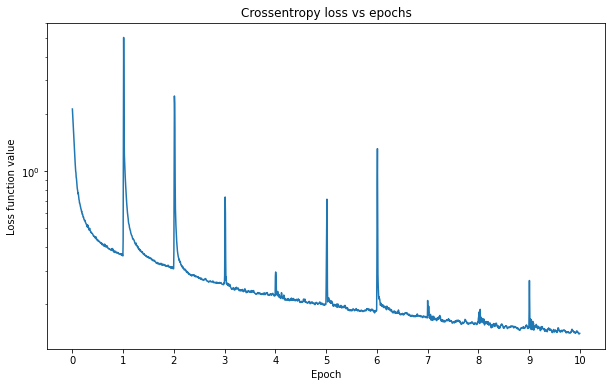

Loss value :
0.14038323


In [128]:
fig = plt.figure(figsize=(10, 6))
all_losses = np.array(e_losses).flatten()
plt.plot(all_losses)
plt.xticks(ticks=np.arange(0, all_losses.shape[0]+1, len(e_losses[0])), labels=np.arange(len(e_losses)+1))
plt.yscale("log")
plt.title("Crossentropy loss vs epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss function value")
plt.show()
print("Loss value :")
print(all_losses[len(all_losses)-1])

With several epochs, we have a better result in less time.
The advantage of this method is to converge more quickly towards a good solution.

## 7) Evaluation of the model

In [142]:
acc = keras.metrics.SparseCategoricalAccuracy()
acc.update_state(y_train, model(x_train))
print("accuracy on the train set: " + str(acc.result().numpy()))

accuracy on the train set: 0.9266


In [143]:
acc.update_state(y_test, model(x_test))
print("accuracy on the test set: " + str(acc.result().numpy()))

accuracy on the test set: 0.92672855


The train and test data set precisions are very close. It's a bit surprising, usually the accuracy of the test is a bit lower.